# Logistic Regression with TensorFlow
By Johnson

## 0. Imports

In [1]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

## 1. Download MNIST dataset

In [2]:
# Using Tensorflow's default tools to fetch data, this is the same as what we did in the first homework assignment.
mnist = input_data.read_data_sets('./mnist', one_hot=True) 

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


In [3]:
# Check the dimension of training, validation and test sets.
mnist.train.images.shape

(55000, 784)

In [4]:
mnist.train.labels.shape

(55000, 10)

In [5]:
mnist.validation.images.shape

(5000, 784)

In [6]:
mnist.validation.labels.shape

(5000, 10)

In [7]:
mnist.test.images.shape

(10000, 784)

In [8]:
mnist.test.labels.shape

(10000, 10)

## 2. Model initialization

In [9]:
# Random seed.
rseed = 42
batch_size = 200
lr = 1e-1
num_epochs = 50
num_train, num_feats = mnist.train.images.shape
num_test = mnist.test.images.shape[0]
num_classes = mnist.train.labels.shape[1]

In [10]:
# Placeholders that should be filled with training pairs (x, y). Use None to unspecify the first dimension 
# for flexibility.
train_x = tf.placeholder(tf.float32, [None, num_feats], name="train_x")
train_y = tf.placeholder(tf.int32, [None, num_classes], name="train_y")
# Model weights of logistic regression.
w = tf.Variable(tf.random_normal(shape=[num_feats, num_classes], stddev=0.1), name="lr_weights")
b = tf.Variable(tf.zeros([num_classes]), name="lr_bias")

## 3. Model training and testing

In [11]:
# logits is the log-probablity of each classes. 
logits = tf.matmul(train_x, w) + b
# Use TensorFlow's default implementation to compute the cross-entropy loss of classification.
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=train_y, name="loss")
loss = tf.reduce_mean(cross_entropy)
# Build prediction function.
preds = tf.nn.softmax(logits)
correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(train_y, 1))
# Need to cast the type of correct_preds to float32 in order to compute the average mean accuracy.
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

In [12]:
# Use TensorFlow's default implementation for optimziation algorithm. Note that we can understand
# an optimization procedure as an OP (operator) as well.
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

In [13]:
# Start training!
num_batches = num_train / batch_size
losses = []
train_accs, valid_accs = [], []
time_start = time.time()
with tf.Session() as sess:
    # Visualize the process in TensorBoard.
    writer = tf.summary.FileWriter("./graphs", sess.graph)
    # Before evaluating the graph, we should initialize all the variables.
    sess.run(tf.global_variables_initializer())
    for i in xrange(num_epochs):
        # Each training epoch contains num_batches of parameter updates.
        total_loss = 0.0
        for _ in xrange(num_batches):
            # Fetch next mini-batch of data using TensorFlow's default method.
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            # Note that we also need to include optimizer into the list in order to update parameters, but we 
            # don't need the return value of optimizer.
            _, loss_batch = sess.run([optimizer, loss], feed_dict = {train_x: x_batch, train_y: y_batch})
            total_loss += loss_batch
        # Compute training set and validation set accuracy after each epoch.
        train_acc = sess.run([accuracy], feed_dict = {train_x: mnist.train.images, train_y: mnist.train.labels})
        valid_acc = sess.run([accuracy], feed_dict = {train_x: mnist.validation.images, train_y: mnist.validation.labels})
        losses.append(total_loss)
        train_accs.append(train_acc)
        valid_accs.append(valid_acc)
        print "Number of iteration: {}, total_loss = {}, train accuracy = {}, validation accuracy = {}".format(i, total_loss, train_acc, valid_acc)
    # Evaluate the test set accuracy at the end.
    test_acc = sess.run([accuracy], feed_dict = {train_x: mnist.test.images, train_y: mnist.test.labels})
time_end = time.time()
print "Time used for training = {} seconds.".format(time_end - time_start)
print "MNIST image classification accuracy on test set = {}".format(test_acc)

Number of iteration: 0, total_loss = 199.884469628, train accuracy = [0.8732], validation accuracy = [0.88279998]
Number of iteration: 1, total_loss = 117.782129318, train accuracy = [0.88987273], validation accuracy = [0.90020001]
Number of iteration: 2, total_loss = 105.314049512, train accuracy = [0.89730906], validation accuracy = [0.9052]
Number of iteration: 3, total_loss = 99.0058018416, train accuracy = [0.90181816], validation accuracy = [0.90939999]
Number of iteration: 4, total_loss = 94.9623123258, train accuracy = [0.90507275], validation accuracy = [0.91180003]
Number of iteration: 5, total_loss = 92.16279836, train accuracy = [0.90807271], validation accuracy = [0.91360003]
Number of iteration: 6, total_loss = 89.897741735, train accuracy = [0.90936363], validation accuracy = [0.9156]
Number of iteration: 7, total_loss = 88.1646697968, train accuracy = [0.91083634], validation accuracy = [0.91720003]
Number of iteration: 8, total_loss = 86.7487377077, train accuracy = [0

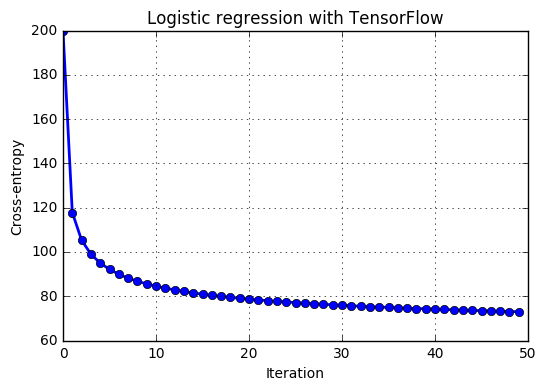

In [14]:
# Plot the losses during training.
plt.figure()
plt.title("Logistic regression with TensorFlow")
plt.plot(losses, "b-o", linewidth=2)
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("Cross-entropy")
plt.show()